In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator



In [3]:
FilePath = "../input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv"
df = pd.read_csv(FilePath)

In [4]:
df

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [5]:
label = df["label"]
df = df.drop(columns=["label"]) 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

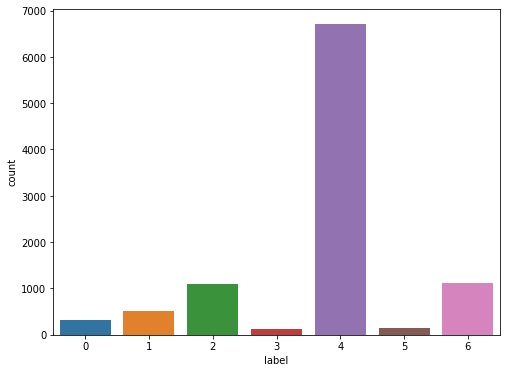

In [6]:
plt.figure(figsize = (8,6))
sns.countplot(label)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

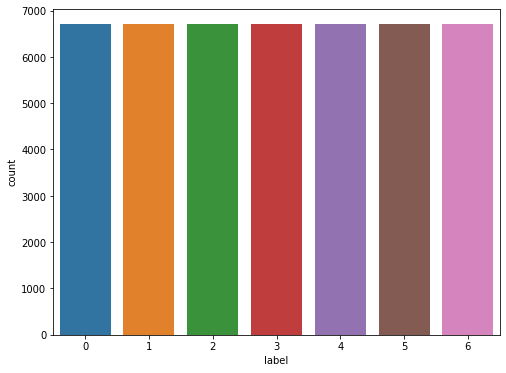

In [8]:
sampler = RandomOverSampler()
df, label = sampler.fit_resample(df, label)

plt.figure(figsize = (8,6))
sns.countplot(label)

In [9]:
X_train , X_test , y_train , y_test = train_test_split(df , label , test_size = 0.2)
X_train = np.array(X_train).reshape(-1,28,28,3)
X_test = np.array(X_test).reshape(-1,28,28,3)

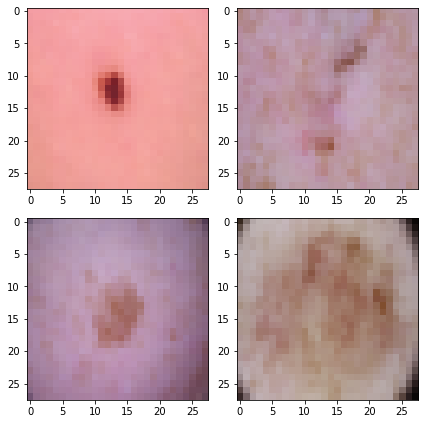

In [10]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(6, 6)
k = 0 
for i in range(2):
    for j in range(2):
        axes[i, j].imshow(X_train[k])
        k += 1
plt.tight_layout()

In [11]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
train_datagen = ImageDataGenerator(rescale=(1./255),
                                   rotation_range=.2,
                                   zoom_range = 0.2,
                                   shear_range=0.2
                                    )
test_datagen = ImageDataGenerator(rescale=(1./255))

In [13]:
train_data = train_datagen.flow(X_train, y_train)
test_data = test_datagen.flow(X_test, y_test)

In [14]:
model = Sequential([
            Input(shape = [28,28,3]),
            Conv2D(32 , (3,3) , activation='relu',padding='same'),
            MaxPooling2D(),
            BatchNormalization(),
            Conv2D(64 , (3,3) , activation='relu',padding='same'),
            Conv2D(64 , (3,3) , activation='relu',padding='same'),
            MaxPooling2D(),
            BatchNormalization(), 
            Conv2D(128 , (3,3) , activation='relu',padding='same'),
            Conv2D(128 , (3,3) , activation='relu',padding='same'),
            MaxPooling2D(),
            BatchNormalization(),
            Conv2D(256 , (3,3) , activation='relu',padding='same'),
            Conv2D(256 , (3,3) , activation='relu',padding='same'),
            MaxPooling2D(),
            Flatten(),
            Dropout(.5),
            Dense(256, activation = 'relu'),
            BatchNormalization(),
            Dense(128, activation = 'relu'),
            BatchNormalization(),
            Dense(64, activation = 'relu'),
            BatchNormalization(),
            Dense(32, activation = 'relu'),
            BatchNormalization(),
            Dense(7, activation = 'softmax'),
])

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [15]:
#make model folder model
model._name = 'skincancer_CNN'
model_save_path = "."
if not os.path.exists(model_save_path):
    os.mkdir(model_save_path)

In [16]:
early_stop = EarlyStopping(patience=10, verbose=1, monitor='val_accuracy', mode='max')
reduce_lr =  ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=7, min_delta=1e-4, mode='max')
checkpoint = ModelCheckpoint(os.path.join(model_save_path, model.name+".h5"), save_weights_only=True,
                             verbose=1, save_best_only=True, monitor='val_acc', mode='max')

In [17]:
model.summary()

Model: "skincancer_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)       

In [18]:
history = model.fit(X_train,
                    y_train,
                    epochs=25,
                    batch_size=128,
                    steps_per_epoch=len(X_train)//128,
                    validation_data= (X_test, y_test),
                    callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/25
293/293 [==============================] - 12s 14ms/step - loss: 1.5638 - accuracy: 0.4038 - val_loss: 1.4033 - val_accuracy: 0.4850
Epoch 2/25
293/293 [==============================] - 3s 11ms/step - loss: 0.5924 - accuracy: 0.7869 - val_loss: 1.8447 - val_accuracy: 0.5258
Epoch 3/25
293/293 [==============================] - 3s 11ms/step - loss: 0.3287 - accuracy: 0.8823 - val_loss: 0.5834 - val_accuracy: 0.7970
Epoch 4/25
293/293 [==============================] - 3s 12ms/step - loss: 0.2284 - accuracy: 0.9170 - val_loss: 0.4473 - val_accuracy: 0.8548
Epoch 5/25
293/293 [==============================] - 3s 11ms/step - loss: 0.1854 - accuracy: 0.9350 - val_loss: 0.4394 - val_accuracy: 0.8644
Epoch 6/25
293/293 [==============================] - 3s 11ms/step - loss: 0.1496 - accuracy: 0.9480 - val_loss: 0.3915 - val_accuracy: 0.8675
Epoch 7/25
293/293 [==============================] - 3s 11ms/step - loss: 0.1339 - accuracy: 0.9538 - val_loss: 0.9984 - val_accuracy: 0.735